In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

# 1. Selenium 기본 사용법

+ pip install selenium
+ Chrome Driver, Phantom JS, ...

In [2]:
from selenium import webdriver

In [7]:
driver = webdriver.Chrome("C:\\chrome\\chromedriver.exe")

C:\Users\alcls\AppData\Local\Temp\ipykernel_16960\511899957.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\chrome\\chromedriver.exe")


In [9]:
driver.get("https://naver.com")

In [10]:
driver.save_screenshot("data/001.png")

True

In [11]:
driver.close()

In [12]:
##### naver 사이트 원격 로그인
driver = webdriver.Chrome("C:\\chrome\\chromedriver.exe")

C:\Users\alcls\AppData\Local\Temp\ipykernel_16960\993101310.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\chrome\\chromedriver.exe")


In [14]:
driver.get("https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com")

In [17]:
login_id = driver.find_element_by_id("id")
login_id.clear()
login_id.send_keys("whatar")

C:\Users\alcls\AppData\Local\Temp\ipykernel_16960\2703280815.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  login_id = driver.find_element_by_id("id")


In [18]:
login_pw = driver.find_element_by_id("pw")
login_pw.send_keys("XXXXXXX")

C:\Users\alcls\AppData\Local\Temp\ipykernel_16960\108859267.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  login_pw = driver.find_element_by_id("pw")


In [19]:
xpath = '//*[@id="log.login"]'
driver.find_element_by_xpath(xpath).click()

C:\Users\alcls\AppData\Local\Temp\ipykernel_16960\2519622614.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath(xpath).click()


# 2. 실습 : 셀프 주유소는 과연 저렴한가 ?

+ 실제 셀프 주유소가 저렴한지에 대한 팩트 체크
+ 가장 싼 주유소는 어디인가 ?
+ https://www.opinet.co.kr

## (1) 서울시 구별 주유소 가격 정보 가져오기

### 1) 연습코드

In [32]:
from selenium import webdriver
# pip install webdriver_manager

from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# driver = webdriver.Chrome("C:\\chrome\\chromedriver.exe")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.opinet.co.kr/searRgSelect.do")

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - There is no [win32] chromedriver for browser 102.0.5005 in cache
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/102.0.5005.61/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\alcls\.wdm\drivers\chromedriver\win32\102.0.5005.61]


In [33]:
##### 시 목록 가져오기

si_list_raw = driver.find_element(By.XPATH, """//*[@id="SIDO_NM0"]""")   #select 태그에서 xpath를 복사해오기
si_list = si_list_raw.find_elements(By.TAG_NAME, "option")    # select 태그 안에서 option 태그 접근 ( 여러개 이므로 elements )
si_list[4].get_attribute("value")   # 여러개의 option 태그에서 4번째인 인천광역시 부분의 value 부분 뽑아오기

si_names = [op.get_attribute("value") for op in si_list]   # list comprehension 으로 si_list를 반복돌며 value 부분만 뽑아오기
si_names.remove("")        # 첫번째 옵션부분에 value가 없어서 공백이 나오므로 삭제
si_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [34]:
##### 시 선택하기

tag = driver.find_element(By.ID, "SIDO_NM0")
tag.send_keys(si_names[0])      # si_names[0] 가 서울을 의미 - 위 결과 참조

In [35]:
##### 구 목록 가져오기

gu_list_raw = driver.find_element(By.XPATH, """//*[@id="SIGUNGU_NM0"]""")      #select 태그에서 xpath를 복사해오기
gu_list = gu_list_raw.find_elements(By.TAG_NAME, "option")     # select 태그 안에서 option 태그 접근 ( 여러개 이므로 elements )

gu_names = [op.get_attribute("value") for op in gu_list]     # list comprehension 으로 gu_list를 반복돌며 value 부분만 뽑아오기
gu_names.remove("")      # 첫번째 옵션부분에 value가 없어서 공백이 나오므로 삭제
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [36]:
##### 구 선택하기

tag1 = driver.find_element(By.ID, "SIGUNGU_NM0")
tag1.send_keys(gu_names[0])     # si_names[0] 가 강남구를 의미 - 위 결과 참조

In [31]:
!pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-generator               1.10
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcry

In [37]:
##### 조회 버튼 누르기

driver.find_element(By.XPATH, """//*[@id="searRgSelect"]/span""").click()

In [38]:
##### 엑셀 저장버튼 누르기

driver.find_element(By.XPATH, """//*[@id="glopopd_excel"]/span""").click()

### 2) 지역별(구별)로 주유소 정보를 엑셀 파일로 저장하기

In [39]:
from tqdm import tqdm_notebook
import time

In [41]:
for gu in tqdm_notebook(gu_names):
    tag1 = driver.find_element(By.ID, "SIGUNGU_NM0")
    tag1.send_keys(gu)
    
    time.sleep(1)
    
    driver.find_element(By.XPATH, """//*[@id="searRgSelect"]/span""").click()
    
    time.sleep(1)
    
    driver.find_element(By.XPATH, """//*[@id="glopopd_excel"]/span""").click()
    
    time.sleep(1)

driver.close()

C:\Users\alcls\AppData\Local\Temp\ipykernel_16960\3539443989.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

## (2) Data Definition

In [42]:
from glob import glob

In [45]:
station_files = glob("data/oil/지역*.xls")

tmp_raw = []
for f in station_files:
    tmp = pd.read_excel(f, header=2)
    tmp_raw.append(tmp)

In [46]:
len(tmp_raw)

25

In [47]:
##### 데이터 프레임으로 합치기

station_raw = pd.concat(tmp_raw)
station_raw.head(50)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,2125,2145,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,2153,2167,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2305,2183,2199,-
3,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,2184,2194,1600
4,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,2185,2189,-
5,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,2187,2195,1600
6,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,2210,2235,1500
7,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,2355,2215,2239,1943
8,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,2421,2215,2249,1800
9,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,2218,2218,-


In [49]:
station_raw.info()    # oil 가격이 object 형태이므로 추후 가격비교시 어려울 수 있음, 이를 float 형태로 만들어야함 - Checklist

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      456 non-null    object
 1   상호      456 non-null    object
 2   주소      456 non-null    object
 3   상표      456 non-null    object
 4   전화번호    456 non-null    object
 5   셀프여부    456 non-null    object
 6   고급휘발유   456 non-null    object
 7   휘발유     456 non-null    object
 8   경유      456 non-null    object
 9   실내등유    456 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


## (3) Data Preprocessing

In [50]:
##### 원하는 컬럼만 추출

stations = pd.DataFrame({"Oil_Store" : station_raw["상호"],
                         "주소" : station_raw["주소"],
                         "가격" : station_raw["휘발유"],
                         "셀프" : station_raw["셀프여부"],
                         "상표" : station_raw["상표"]})

stations.head()

,Oil_Store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2125,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2153,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2184,N,SK에너지
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2185,Y,GS칼텍스


In [64]:
##### 구 파생변수 추가 ( 주소에서 구 부분만 뽑아서 "구"라는 컬럼으로 추가 )

# stations["구"] = [item.split()[1] for item in station["주소"]]
stations["구"] = stations["주소"].str.split(" ").str[1]

stations.head()

,Oil_Store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2125,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2153,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2184,N,SK에너지,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2185,Y,GS칼텍스,강동구


In [66]:
print(stations["구"].unique())
print(len(stations["구"].unique()))

['강동구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구'
 '강북구' '용산구' '은평구' '종로구' '중구' '중랑구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구'
 '도봉구' '강남구']
25


In [71]:
##### 휘발유 가격 결측치

stations["가격"].unique()     # 결측치  ' - ' 발견

stations[stations["가격"] == "-"]      # 가격이 '-'  즉, 결측치인 주유소 찾기

stations = stations[stations["가격"] != "-"]      # 결측치,  가격이 없는 주유소는 제외하고 담기

In [72]:
stations.info()           # 결측치가 없는 주유소들만 ( 기존 주유소 숫자 456개에서 줄은 것 확인 )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 33
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_Store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    object
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [75]:
##### 가격 정보를 숫자형태(수치) 로 변환

# stations["가격"] = [float(val) for val in stations["가격"]]
stations["가격"] = stations["가격"].astype(float)
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 33
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_Store  447 non-null    object 
 1   주소         447 non-null    object 
 2   가격         447 non-null    float64
 3   셀프         447 non-null    object 
 4   상표         447 non-null    object 
 5   구          447 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.4+ KB


In [78]:
##### 인덱스 재조정

stations.reset_index(inplace=True)   # drop-True 설정을 하면 컬럼으로 올라간 기존 인덱스를 삭제할 수 있다.

In [79]:
##### 열로 올라간 기존 인덱스 삭제

del stations["index"]

In [80]:
stations.head()

,Oil_Store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2125.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2153.0,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183.0,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2184.0,N,SK에너지,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2185.0,Y,GS칼텍스,강동구


## (4) EDA

+ 셀프 여부에 따른 가격 차이

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

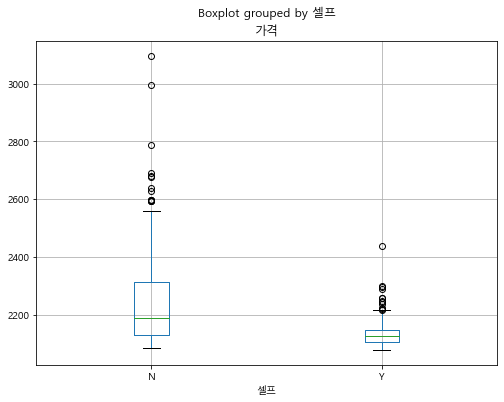

In [83]:
stations.boxplot(by="셀프", column="가격", figsize=(8, 6))

# 기존 주유소의 최대값은 2500원이 넘고 2600원 아래 수준, 최소값은 2100원 수준
# 셀프 주유소의 최대값은 2200원이 조금 넘는 수준, 최소값은 2000원에서 2100원 사이 수준
# 중간 값만 놓고 봐도 셀프주유소가 기존 주유소보다 싸다는 것을 확인할 수 있다.

+ 주유소의 상표별로 얼마나 저렴한가 ?

<AxesSubplot:title={'center':'가격'}, xlabel='상표'>

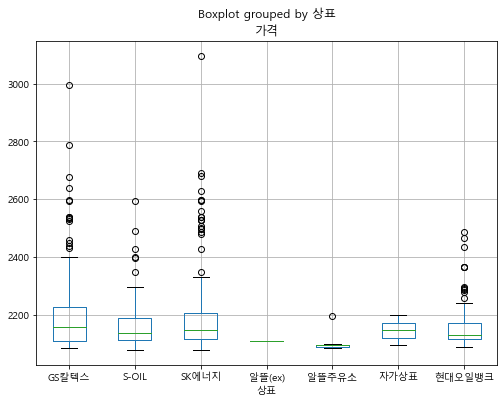

In [84]:
stations.boxplot(by="상표", column="가격", figsize=(8, 6))

C:\Users\alcls\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alcls\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\alcls\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='상표', ylabel='가격'>

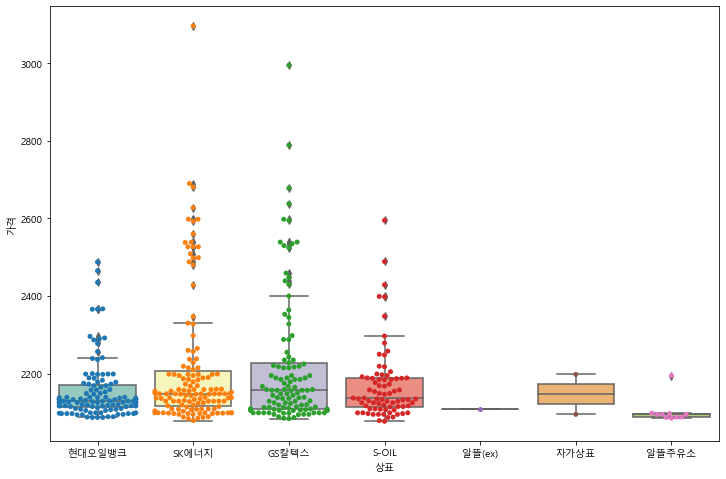

In [88]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")    # seaborn 의 boxplot 을 사용
sns.swarmplot(x="상표", y="가격", data=stations)  # swarmplot 은 분포상태를 더 구체적으로 확인가능하게끔 꾸며준다.

+ 구별 주유 가격 확인

In [90]:
##### 서울시에서 가장 주유가격이 비싼 주유소가 어디인가?  (10개만 확인)
stations.sort_values(by="가격", ascending=False).head(10)

,Oil_Store,주소,가격,셀프,상표,구
277,서남주유소,서울 중구 통일로 30,3096.0,N,SK에너지,중구
243,서계주유소,서울특별시 용산구 청파로 367 (청파동),2995.0,N,GS칼텍스,용산구
276,필동주유소,서울 중구 퇴계로 196 (필동2가),2789.0,N,GS칼텍스,중구
242,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690.0,N,SK에너지,용산구
241,한석주유소,서울 용산구 이촌로 164,2681.0,N,SK에너지,용산구
275,약수주유소,서울 중구 다산로 173,2678.0,N,GS칼텍스,중구
446,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638.0,N,GS칼텍스,강남구
240,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628.0,N,SK에너지,용산구
370,구로주유소,서울 구로구 구로동로 137 (구로동),2598.0,N,GS칼텍스,구로구
274,신당동주유소,서울 중구 다산로 242 (신당동),2598.0,N,SK에너지,중구


In [91]:
##### 서울시에서 가장 주유가격이 싼 주유소가 어디인가?  (10개만 확인)
stations.sort_values(by="가격", ascending=True).head(10)

,Oil_Store,주소,가격,셀프,상표,구
278,오천만주유소,서울 중랑구 동일로 547 (면목동),2077.0,Y,S-OIL,중랑구
168,현대주유소,서울 양천구 남부순환로 372 (신월동),2079.0,Y,S-OIL,양천구
14,동서울고속주유소,서울 동대문구 한천로 414,2079.0,Y,SK에너지,동대문구
169,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),2084.0,Y,SK에너지,양천구
220,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084.0,Y,GS칼텍스,강북구
371,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2085.0,Y,GS칼텍스,금천구
15,삼영주유소,서울 동대문구 답십리로 258 (장안동),2085.0,N,SK에너지,동대문구
114,원천주유소,서울 성북구 돌곶이로 142 (장위동),2085.0,N,알뜰주유소,성북구
351,신성주유소,서울 구로구 구로동로 187 (구로제2동),2087.0,Y,현대오일뱅크,구로구
282,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),2087.0,N,현대오일뱅크,중랑구


+ 구 별로 평균값 산출

In [94]:
gu_mean = stations.pivot_table(index=["구"], values=["가격"], aggfunc=np.mean)
gu_mean.head()

,가격
구,
강남구,2310.705882
강동구,2220.785714
강북구,2108.272727
강서구,2159.968750
관악구,2157.000000


In [95]:
##### 구별 평균값을 지도로 표시

import folium
import json

map = folium.Map(location=[37.497955, 127.027619], zoom_start= 10)

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map.choropleth(geo_data=geo_str, data=gu_mean, key_on="feature.id", 
               columns=[gu_mean.index, "가격"], fill_color="PuRd")

map

C:\Users\alcls\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


+ 주유 가격 상하위 10개씩을 지도에 표시

In [97]:
oil_price_top10 = stations.sort_values(by="가격", ascending=False).head(10)    # 상위 10개
oil_price_bottom10 = stations.sort_values(by="가격", ascending=True).head(10)   # 하위 10개

In [99]:
oil_price_top10.head()

,Oil_Store,주소,가격,셀프,상표,구
277,서남주유소,서울 중구 통일로 30,3096.0,N,SK에너지,중구
243,서계주유소,서울특별시 용산구 청파로 367 (청파동),2995.0,N,GS칼텍스,용산구
276,필동주유소,서울 중구 퇴계로 196 (필동2가),2789.0,N,GS칼텍스,중구
242,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690.0,N,SK에너지,용산구
241,한석주유소,서울 용산구 이촌로 164,2681.0,N,SK에너지,용산구


In [101]:
import requests

header = {"Authorization":"KakaoAK 872d679b7aa257eb46c4bc7bac47e7fe"}
url = "https://dapi.kakao.com/v2/local/search/keyword.json?query=서울시 중구 통일로 30"

requests.get(url, headers=header).json()

{'documents': [{'address_name': '서울 중구 봉래동1가 126-2',
   'category_group_code': 'OL7',
   'category_group_name': '주유소,충전소',
   'category_name': '교통,수송 > 자동차 > 주유,가스 > 주유소 > SK주유소',
   'distance': '',
   'id': '11378206',
   'phone': '02-752-9475',
   'place_name': '서남주유소',
   'place_url': 'http://place.map.kakao.com/11378206',
   'road_address_name': '서울 중구 통일로 30',
   'x': '126.972067727197',
   'y': '37.5583624710728'},
  {'address_name': '서울 중구 봉래동1가 126-2',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 전자제품 > 전자제품서비스센터 > 컴퓨터수리',
   'distance': '',
   'id': '359596554',
   'phone': '',
   'place_name': '컴닥터PC119 봉래점',
   'place_url': 'http://place.map.kakao.com/359596554',
   'road_address_name': '서울 중구 통일로 30',
   'x': '126.972171842689',
   'y': '37.5583841195901'},
  {'address_name': '서울 중구 봉래동1가 126-2',
   'category_group_code': '',
   'category_group_name': '',
   'category_name': '가정,생활 > 화장실',
   'distance': '',
   'id': '26334205',
 

In [110]:
oil_price_top10["주소"][243].split(" (")[0]

'서울특별시 용산구  청파로 367'

In [114]:
##### 상위 10개 위도와 경도 구하기

lat = []
lng = []

for n in oil_price_top10.index:
    tmp_addr = oil_price_top10["주소"][n].split(" (")[0]
    url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(tmp_addr)
    
    lat.append(requests.get(url, headers=header).json()["documents"][0]["y"])
    lng.append(requests.get(url, headers=header).json()["documents"][0]["x"])

In [115]:
len(lat), len(lng)

(10, 10)

In [116]:
oil_price_top10["lat"] = lat
oil_price_top10["lng"] = lng

In [117]:
oil_price_top10

,Oil_Store,주소,가격,셀프,상표,구,lat,lng
277,서남주유소,서울 중구 통일로 30,3096.0,N,SK에너지,중구,37.5583624710728,126.972067727197
243,서계주유소,서울특별시 용산구 청파로 367 (청파동),2995.0,N,GS칼텍스,용산구,37.552339430427,126.968973680782
276,필동주유소,서울 중구 퇴계로 196 (필동2가),2789.0,N,GS칼텍스,중구,37.560888397210455,126.99367314920487
242,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690.0,N,SK에너지,용산구,37.550198593632054,126.97233784444886
241,한석주유소,서울 용산구 이촌로 164,2681.0,N,SK에너지,용산구,37.5214701537876,126.965371088191
275,약수주유소,서울 중구 다산로 173,2678.0,N,GS칼텍스,중구,37.558993985065825,127.01272807915872
446,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638.0,N,GS칼텍스,강남구,37.5115223360554,127.047170143424
240,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628.0,N,SK에너지,용산구,37.5222715219654,126.993217131219
370,구로주유소,서울 구로구 구로동로 137 (구로동),2598.0,N,GS칼텍스,구로구,37.4908234769164,126.88372192962
274,신당동주유소,서울 중구 다산로 242 (신당동),2598.0,N,SK에너지,중구,37.5645598809175,127.016461938004


In [118]:
##### 하위 10개 위도, 경도 구하기

lat = []
lng = []

for n in oil_price_bottom10.index:
    tmp_addr = oil_price_bottom10["주소"][n].split(" (")[0]
    url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(tmp_addr)
    
    lat.append(requests.get(url, headers=header).json()["documents"][0]["y"])
    lng.append(requests.get(url, headers=header).json()["documents"][0]["x"])

oil_price_bottom10["lat"] = lat
oil_price_bottom10["lng"] = lng

In [119]:
len(lat), len(lng)

(10, 10)

In [121]:
oil_price_bottom10

,Oil_Store,주소,가격,셀프,상표,구,lat,lng
278,오천만주유소,서울 중랑구 동일로 547 (면목동),2077.0,Y,S-OIL,중랑구,37.5790692279024,127.07932787618
168,현대주유소,서울 양천구 남부순환로 372 (신월동),2079.0,Y,S-OIL,양천구,37.5339080509165,126.829180082159
14,동서울고속주유소,서울 동대문구 한천로 414,2079.0,Y,SK에너지,동대문구,37.5975358033876,127.068046419323
169,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),2084.0,Y,SK에너지,양천구,37.5282839918722,126.832948896256
220,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084.0,Y,GS칼텍스,강북구,37.6198927803583,127.029042677761
371,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2085.0,Y,GS칼텍스,금천구,37.4412997570268,126.903081124264
15,삼영주유소,서울 동대문구 답십리로 258 (장안동),2085.0,N,SK에너지,동대문구,37.5722895290199,127.068824890387
114,원천주유소,서울 성북구 돌곶이로 142 (장위동),2085.0,N,알뜰주유소,성북구,37.61496516160006,127.05276719764461
351,신성주유소,서울 구로구 구로동로 187 (구로제2동),2087.0,Y,현대오일뱅크,구로구,37.4951614066511,126.882389880333
282,(주)자연에너지 대창주유소,서울 중랑구 동일로 636 (면목동),2087.0,N,현대오일뱅크,중랑구,37.5872063987486,127.080215109


In [125]:
##### 지도에 상위 10개, 하위 10개 마킹하기

map = folium.Map(location=[37.497955, 127.027619], zoom_start= 11)

for n in oil_price_top10.index:
    folium.CircleMarker(location=[oil_price_top10["lat"][n], 
                                  oil_price_top10["lng"][n]], 
                                radius=10,
                   color="#CD3181", fill_color="#CD3181").add_to(map)

for n in oil_price_bottom10.index:
    folium.CircleMarker(location=[oil_price_bottom10["lat"][n], 
                                  oil_price_bottom10["lng"][n]], 
                                radius=10,
                   color="#3186CC", fill_color="#3186CC").add_to(map)
    
map